In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
# Reading test.csv and train.csv
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [24]:
# Printing the first 5 rows of the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Description of Training Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# Dropping Cabin, Name and Ticket columns from training and test sets
train = train.drop('Cabin', axis=1)
train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)
test = test.drop('Cabin', axis=1)
test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)

In [27]:
# One Hot Encoding Sex, Embarked and PClass in both training and test sets
train = pd.get_dummies(train, columns=["Sex", "Embarked", "Pclass"])
test = pd.get_dummies(test, columns=["Sex", "Embarked", "Pclass"])

In [28]:
train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False
4,5,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,False,True,False,False,True,False,True,False
887,888,1,19.0,0,0,30.0000,True,False,False,False,True,True,False,False
888,889,0,NaN,1,2,23.4500,True,False,False,False,True,False,False,True
889,890,1,26.0,0,0,30.0000,False,True,True,False,False,True,False,False


In [29]:
test

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,False,True,False,True,False,False,False,True
1,893,47.0,1,0,7.0000,True,False,False,False,True,False,False,True
2,894,62.0,0,0,9.6875,False,True,False,True,False,False,True,False
3,895,27.0,0,0,8.6625,False,True,False,False,True,False,False,True
4,896,22.0,1,1,12.2875,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,False,True,False,False,True,False,False,True
414,1306,39.0,0,0,108.9000,True,False,True,False,False,True,False,False
415,1307,38.5,0,0,7.2500,False,True,False,False,True,False,False,True
416,1308,NaN,0,0,8.0500,False,True,False,False,True,False,False,True


In [30]:
# Normalising Age, SibSp, Fare and Parch in both Training and Test Data
train["Age"] = train["Age"]/train["Age"].max()
train["SibSp"] = train["SibSp"]/train["SibSp"].max()
train["Fare"] = train["Fare"]/train["Fare"].max()
train["Parch"] = train["Parch"]/train["Parch"].max()

test["Age"] = test["Age"]/test["Age"].max()
test["SibSp"] = test["SibSp"]/test["SibSp"].max()
test["Fare"] = test["Fare"]/test["Fare"].max()
test["Parch"] = test["Parch"]/test["Parch"].max()

In [31]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0.2750,0.125,0.0,0.014151,False,True,False,False,True,False,False,True
1,2,1,0.4750,0.125,0.0,0.139136,True,False,True,False,False,True,False,False
2,3,1,0.3250,0.000,0.0,0.015469,True,False,False,False,True,False,False,True
3,4,1,0.4375,0.125,0.0,0.103644,True,False,False,False,True,True,False,False
4,5,0,0.4375,0.000,0.0,0.015713,False,True,False,False,True,False,False,True


In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [33]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

In [35]:
train = train.drop('PassengerId', axis=1)

In [36]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [50]:
# Making X_train and y_train
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

X_array = np.asarray(X_train).astype('float')
y_array = np.asarray(y_train).astype('float')

tf.convert_to_tensor(X_array)
tf.convert_to_tensor(y_array)

<tf.Tensor: shape=(891,), dtype=float64, numpy=
array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1

In [51]:
# MODEL
# 1. Create the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(12, activation="relu"),
tf.keras.layers.Dense(8, activation="relu"),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"])
# 3. Fit the Model
#model_array = np.asarray(model).astype('float32')
history = model.fit(X_array, y_array, epochs = 250)

Epoch 1/250
28/28 [==============================] - 1s 963us/step - loss: 0.6467 - accuracy: 0.6914
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7744
Epoch 3/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8025
Epoch 4/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8058
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8070
Epoch 6/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8092
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8171
Epoch 8/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8148
Epoch 9/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8159
Epoch 10/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8081
Epoch 1

<Axes: title={'center': 'Loss and Accuracy'}>

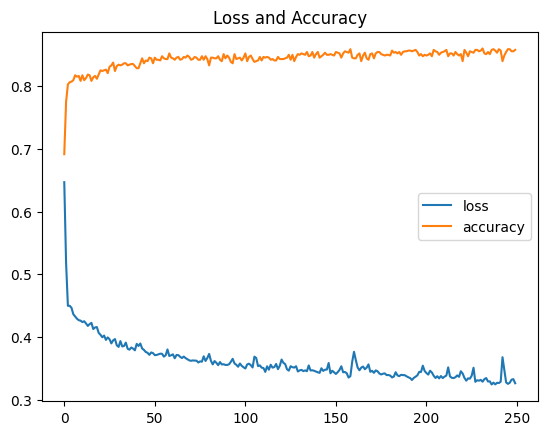

In [52]:
# Plotting the Loss and Accuracy over 250 epochs
pd.DataFrame(history.history).plot(title="Loss and Accuracy")

In [53]:
# Drop the Passenger id and store it in a new variable
X_test = test.drop("PassengerId", axis=1)
PassengerId = test["PassengerId"]
# X_test still has some missing data
X_test.isnull().sum()

Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

In [55]:
# Putting Mean of Age and Fare
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())

X_test_array = np.asarray(X_test).astype('float')
tf.convert_to_tensor(X_test_array)

<tf.Tensor: shape=(418, 12), dtype=float64, numpy=
array([[0.45394737, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.61842105, 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.81578947, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50657895, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39832356, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39832356, 0.125     , 0.11111111, ..., 0.        , 0.        ,
        1.        ]])>

In [57]:
# X_test is now ready to go into the model and give us the predictions
y_probs = model.predict(X_test_array) # probs is prediction probabilities
# Converting all prediction probabilities to integers
y_preds = y_probs.round()

14/14 [==============================] - 0s 692us/step


In [58]:
output_df = pd.DataFrame(data=PassengerId, columns=["PassengerId"])
output_df["Survived"] = y_preds.astype(int)

In [59]:
display(output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
